Redirect the logger outputs (stack and Spectractor) to the notebook:

In [1]:
# This cell requires ≥w_2021_16
from lsst.log.utils import enable_notebook_logging
enable_notebook_logging()

Make a bulter, pick an image, and make a data reference to it:

In [2]:
import lsst.daf.persistence as dafPersist
butler = dafPersist.Butler('/project/shared/auxTel/rerun/quickLook')

dataId = {'dayObs': '2020-03-15', 'seqNum': 162}
dataRef = butler.dataRef('raw', **dataId)

<ipython-input-2-263877ad33a4>:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler('/project/shared/auxTel/rerun/quickLook')
<ipython-input-2-263877ad33a4>:2: FutureWarning: Gen2 Butler has been deprecated (LatissMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler('/project/shared/auxTel/rerun/quickLook')
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading exposure registry from /lsstdata/offline/teststand/auxTel/L1Archiver/gen2repo/registry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3


Instantiate the task, set our config options

In [3]:
from lsst.atmospec import ProcessStarTask

config = ProcessStarTask.ConfigClass()
config.doDisplayPlots = True
config.binning = 16
task = ProcessStarTask(config=config)

Set this so that the plots pop up in the notebook

In [4]:
%matplotlib inline

Run, and watch the debug plots roll in. If you've selected a writable rerun above, the result will also be butler.put() in there so you can butler.get() it later, but we can also catch the result as it's returned by the runDataRef() method

processStar INFO: Processing {'dayObs': '2020-03-15', 'seqNum': 162, 'expId': 2020031500162, 'detector': 0}
Ignoring translator header fixup of LATISS AT_O_20200315_000162: 'MJD-OBS not found'
CameraMapper WARN: Cannot reconcile filter FilterLabel(physical="empty~ronchi90lpmm") with data ID 'EMPTY~ronchi90lpmm'.
processStar INFO: Loaded postISRCCD from disk
Ignoring translator header fixup of LATISS AT_O_20200315_000162: 'MJD-OBS not found'
CameraMapper WARN: Cannot reconcile filter FilterLabel(physical="empty~ronchi90lpmm") with data ID 'EMPTY~ronchi90lpmm'.
processStar INFO: Loaded icExp and icSrc from disk
Ignoring translator header fixup of LATISS AT_O_20200315_000162: 'MJD-OBS not found'
CameraMapper WARN: Cannot reconcile filter FilterLabel(physical="phot_g_mean") with data ID 'EMPTY~ronchi90lpmm'.
processStar INFO: Loaded calexp from disk
lsst.atmospec.spectraction WARN: Supplementary parameter already existed CALLING_CODE in parameters, use overrideParameters() to override alre

Loading config from /home/mfl/lsst/Spectractor/config/auxtel.ini


2021-04-09 15:43:37,374 Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=0.7277207358361161 but average of self.read_out_noise is 1.0.
/home/mfl/lsst/atmospec/python/lsst/atmospec/spectraction.py:169: FutureWarning: Call to deprecated method getFilter. (Replaced by getFilterLabel. Will be removed after v22.) -- Deprecated since version v22.0.
  filterName = exp.getFilter().getName()


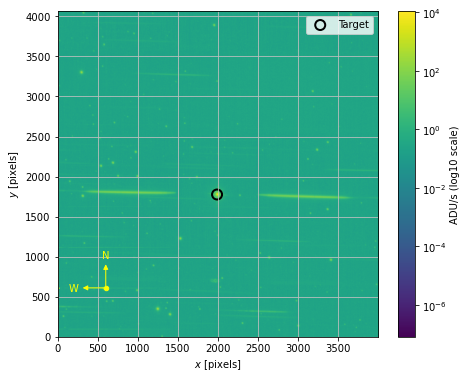

lsst.atmospec.spectraction INFO: Pixel value at centroid = 9508.386458333332
/home/mfl/lsst/Spectractor/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


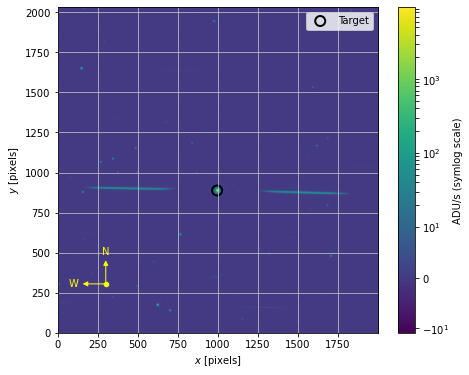

lsst.atmospec.spectraction INFO: Search for the target in the image...
2021-04-09 15:43:44,474 Image      find_target_Moffat2D WARNING 
	X=92.90, Y=103.14 target position determination probably wrong: 8.2 pixels from profile detection (100.28, 99.56)


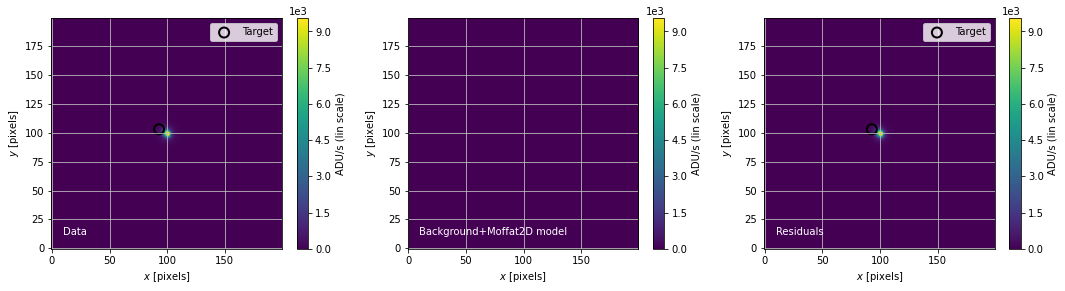

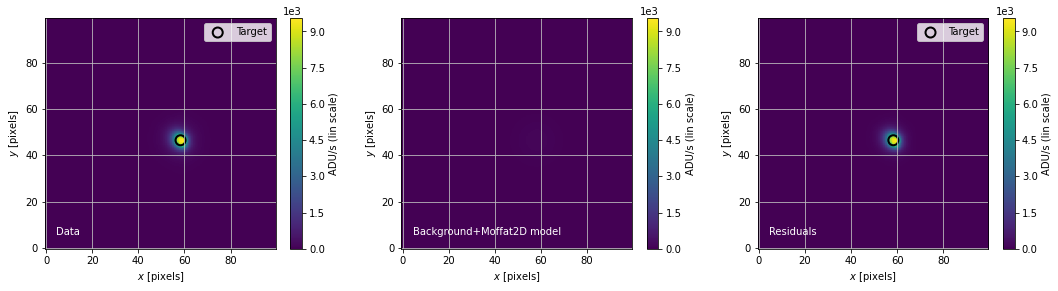

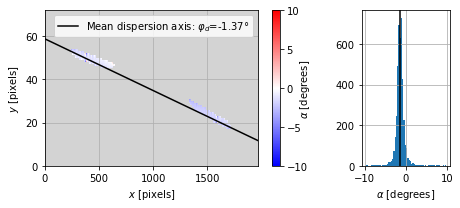

/home/mfl/lsst/Spectractor/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


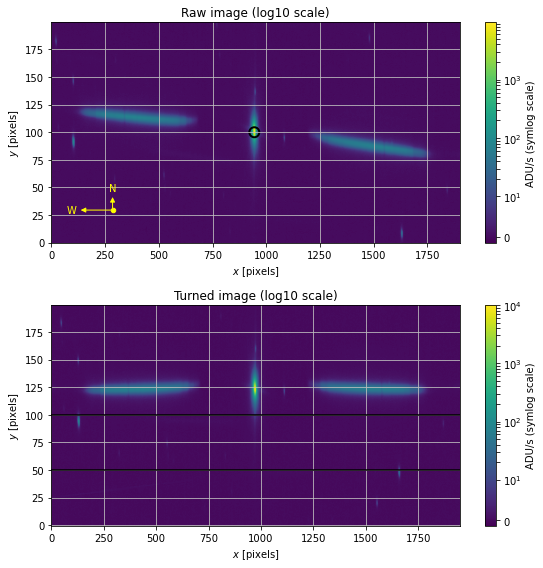

lsst.atmospec.spectraction INFO: Search for the target in the rotated image...


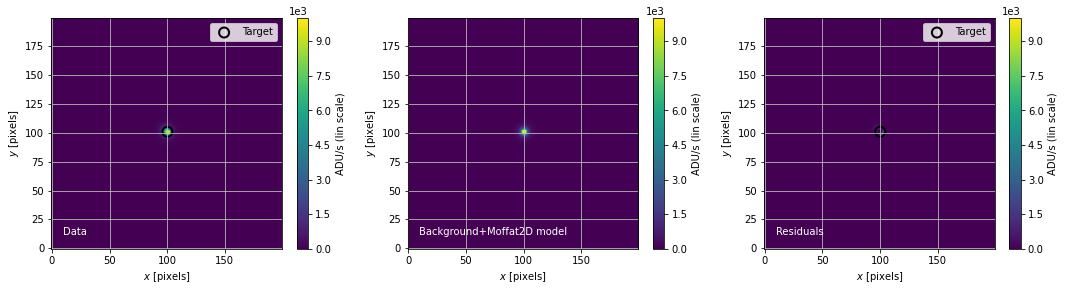

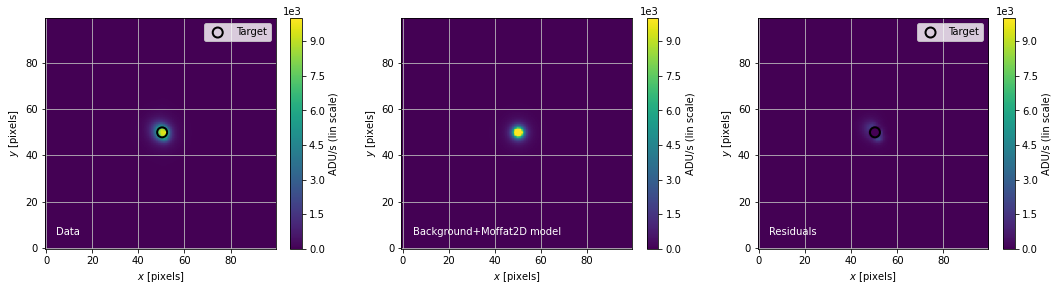

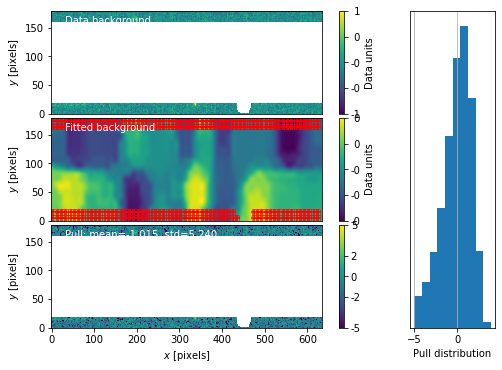

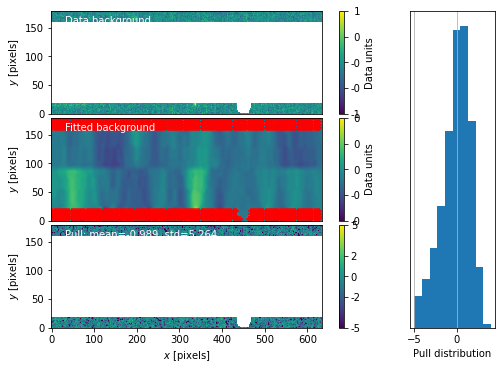

2021-04-09 15:44:05,574 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-10.6918986796366).
2021-04-09 15:44:05,576 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (90.0).
2021-04-09 15:44:05,577 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (3.0).
2021-04-09 15:44:05,578 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (2.0).
2021-04-09 15:44:05,580 spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent terminated in 0 iterations because all parameters have null Jacobian.
/home/mfl/.conda/envs/merlin-lsst-scipipe-rubinenv-1/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: conver

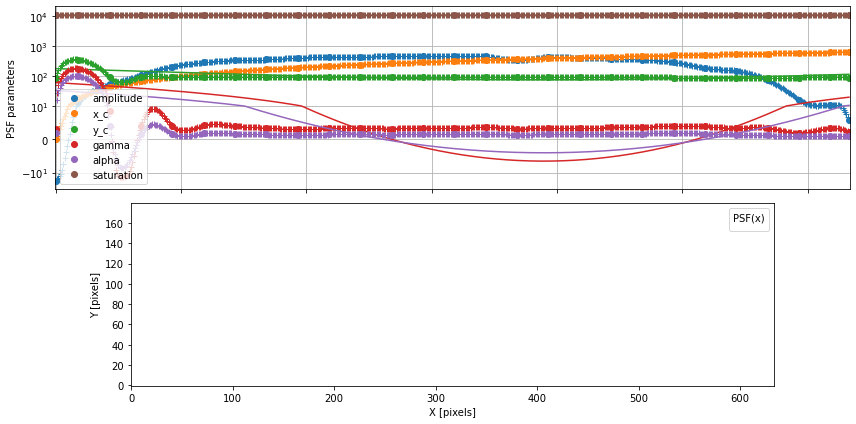

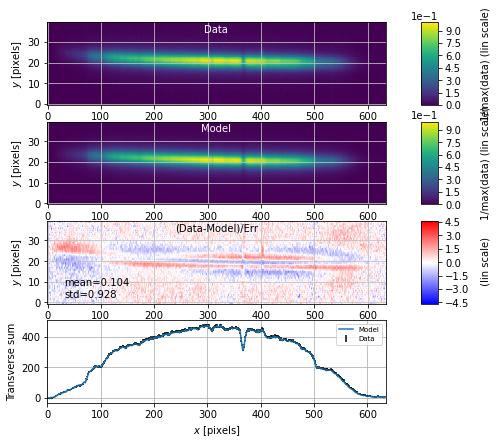

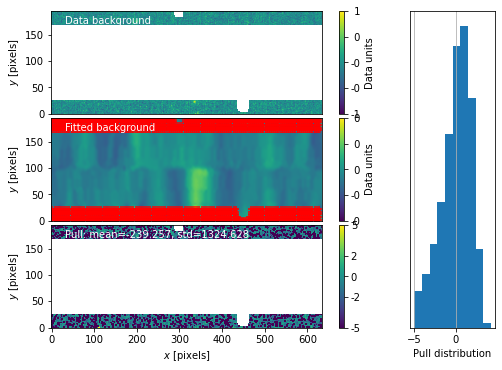

/home/mfl/lsst/Spectractor/spectractor/fit/fitter.py:1296: OptimizeWarning: Unknown solver options: gtol, maxls, maxcor
  result = optimize.minimize(nll, fit_workspace.p, method=minimizer_method,


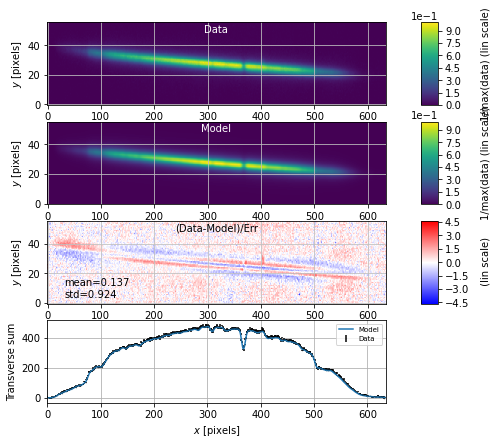

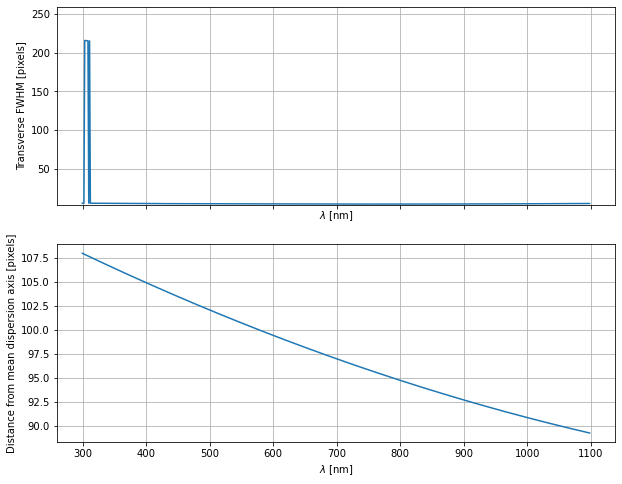

/home/mfl/lsst/Spectractor/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


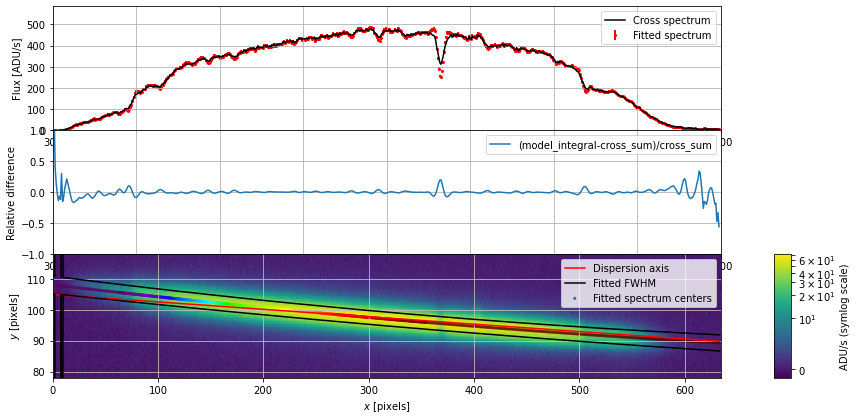

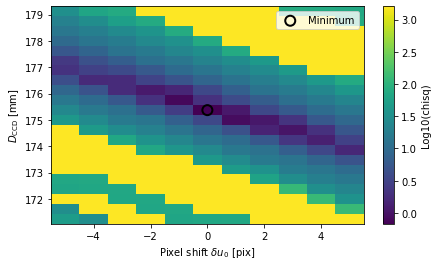

2021-04-09 15:48:15,093 Spectrum   convert_from_flam_to_ADUrate WARNING You ask to convert spectrum already in ADU/s in ADU/s... check your code ! Skip the instruction


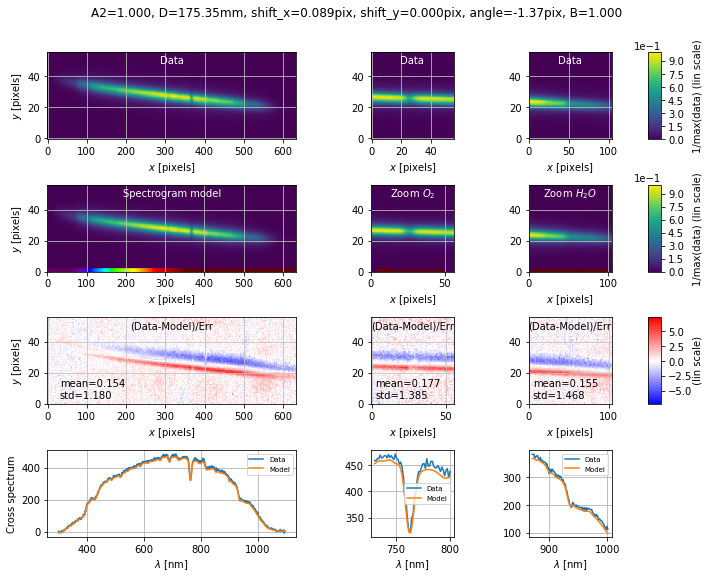

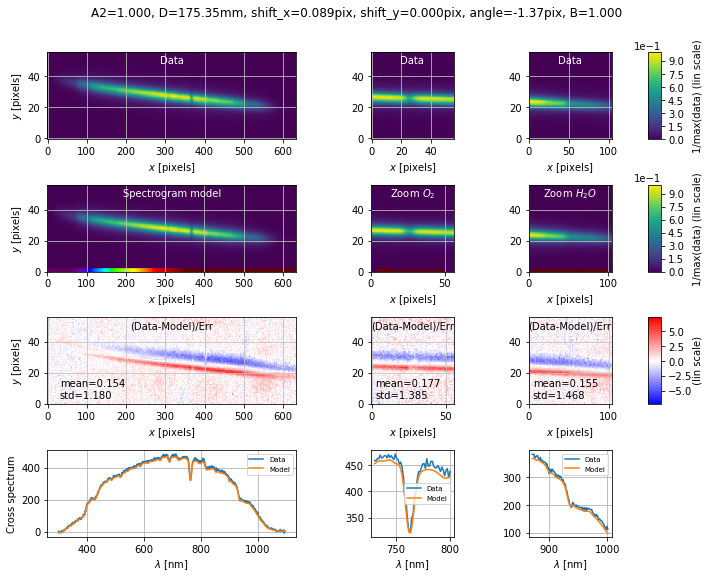

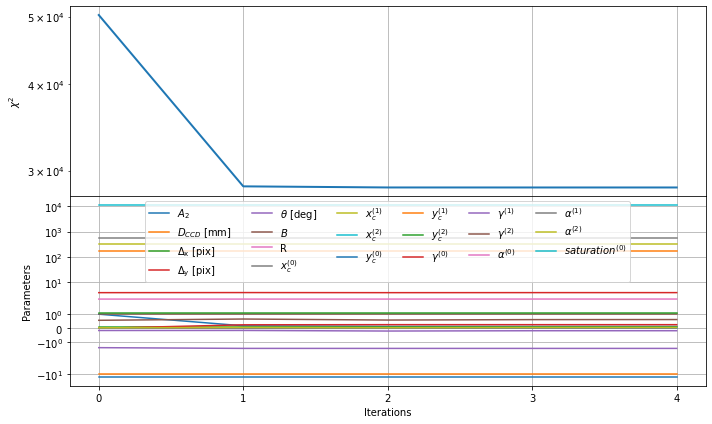

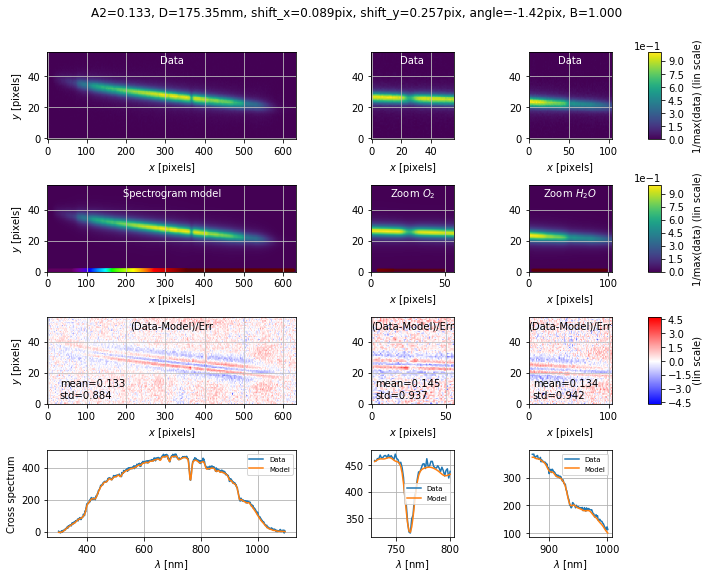

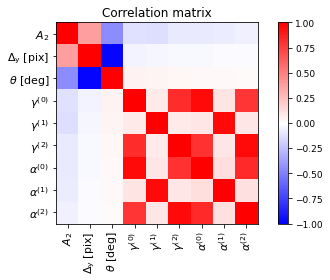

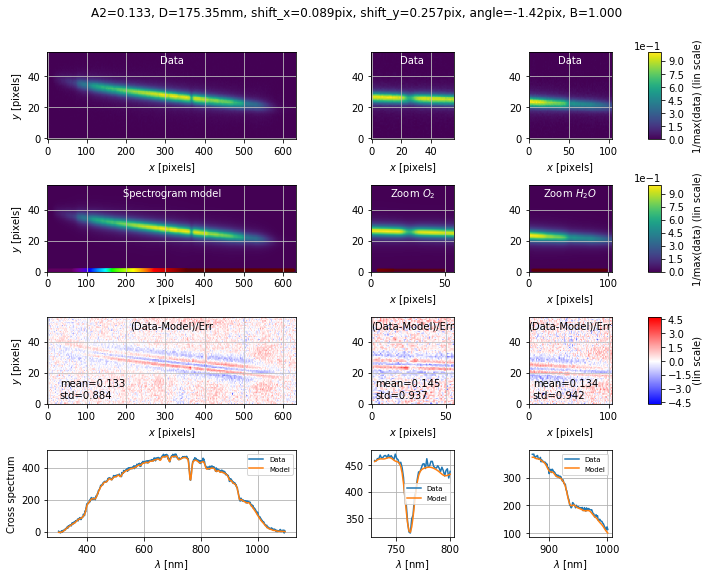

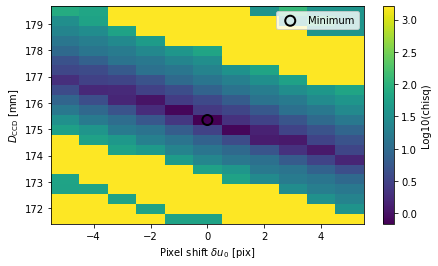

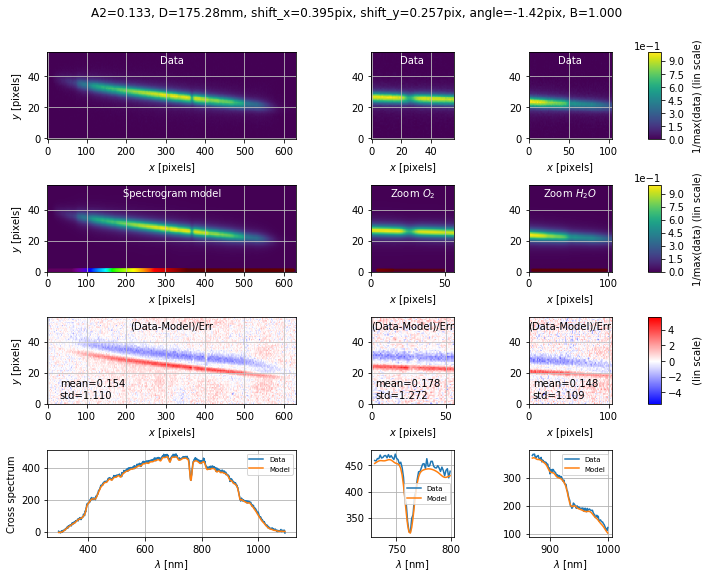

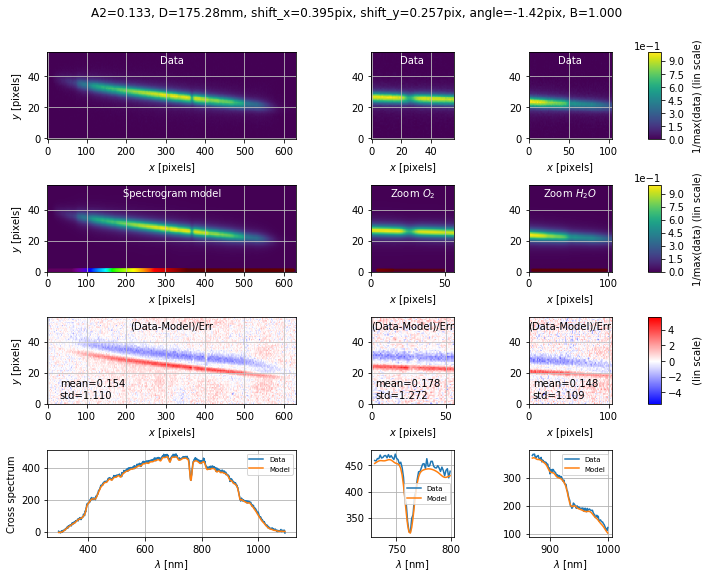

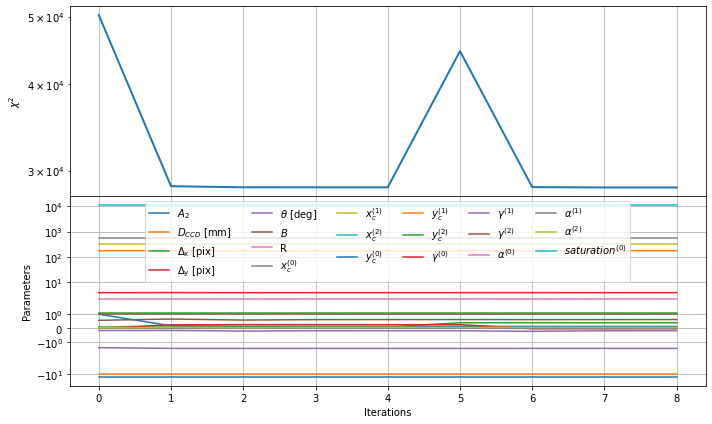

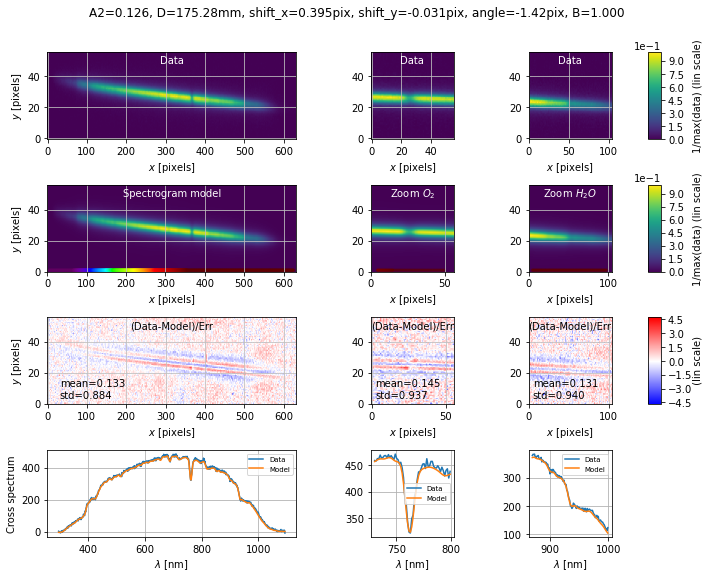

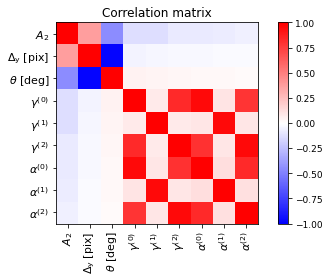

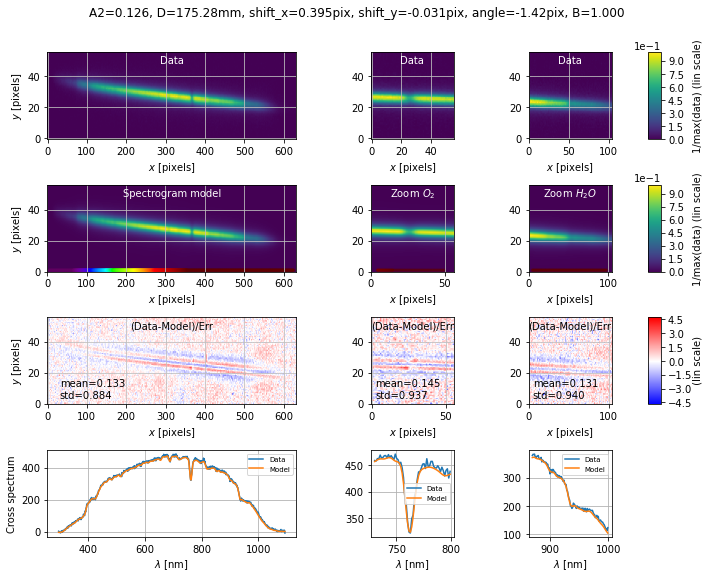

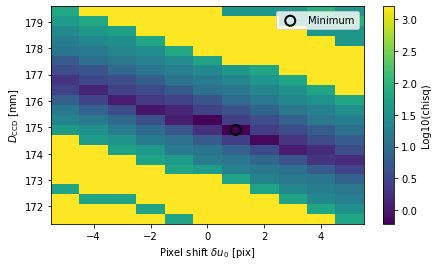

2021-04-09 15:55:53,269 astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-09 15:55:53,410 astropy    _showwarning         WARNING UnitsWarning: 'erg/s/cm$^2$/nm' did not parse as fits unit: Invalid character at col 8 If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html
2021-04-09 15:55:53,416 astropy    _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 0, Unit 'reduced' not supported by the FITS standard.  If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html
processStar INFO: Finished processing {'dayObs': 

In [5]:
result = task.runDataRef(dataRef)